In [1]:
import sys
sys.path.append('/mnt/c/Users/Prasa/OneDrive/dfenn-main')

import tensorflow as tf
from tensorflow import keras
from keras import *
from keras.models import Sequential
import keras_tuner as kt
import pickle
from modules.train_cnn import *
from modules.process_data import *
from modules.validate import *
import os

os.environ[
    "TF_CPP_MIN_LOG_LEVEL"
] = "3"  # this is to silence some of TF warning messages
import typer
from typing_extensions import Annotated


2024-01-27 14:41:34.499857: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-27 14:41:34.748952: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-27 14:41:34.753382: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-27 14:41:36.815587: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
def scramble(
    data_in_path: str,
    data_out_path: str,
    scramble_row: Annotated[bool, typer.Option()] = True,
    free_scramble: Annotated[bool, typer.Option()] = False,
    seed: Annotated[int, typer.Option()] = None,
):
    # read in data
    data_in = pickle.load(open(f"{data_in_path}", "rb"))

    # scramble data and store in a new variable
    scramble_data = []
    # iterate through the data array and alter each tensor
    for tensor in data_in:
        scramble_tensor = scramble_snp_tensor(
            tensor, scramble_row=scramble_row, free_scramble=free_scramble, seed=seed
        )
        scramble_data.append(scramble_tensor)

    # save output scrambled data as a numpy array
    pickle.dump(np.array(scramble_data), open(f"{data_out_path}", "wb"))

In [4]:
scramble('../processed_LD_data/test_data_r2_labeled_tensors', '../processed_LD_data/test_r2_scrambled_tensors')

In [3]:
scramble('../processed_LD_data/r2_data/test_data_r2_labeled_tensors', '../processed_LD_data/r2_data/test_r2_free_scrambled_tensors', free_scramble=True)

In [5]:
r2_train_tensors = np.array(pickle.load(open('../processed_LD_data/r2_data/train_data_r2_labeled_tensors', "rb")))
r2_train_labels = np.array(pickle.load(open('../processed_LD_data/r2_data/train_data_r2_labeled_labels', "rb")))

r2_test_tensors = np.array(pickle.load(open('../processed_LD_data/r2_data/test_data_r2_labeled_tensors', "rb")))
r2_test_labels = np.array(pickle.load(open('../processed_LD_data/r2_data/test_data_r2_labeled_labels', "rb")))

r2_test_scrambled_tensors = np.array(pickle.load(open('../processed_LD_data/r2_data/test_r2_scrambled_tensors', 'rb')))
r2_test_free_scrambled_tensors = np.array(pickle.load(open('../processed_LD_data/r2_data/test_r2_free_scrambled_tensors', 'rb')))

Epoch 1/30
76/76 [==============================] - 9s 112ms/step - loss: 1.6342 - mean_squared_error: 1.6342
Epoch 2/30
76/76 [==============================] - 8s 109ms/step - loss: 0.2241 - mean_squared_error: 0.2241
Epoch 3/30
76/76 [==============================] - 9s 120ms/step - loss: 0.1987 - mean_squared_error: 0.1987
Epoch 4/30
76/76 [==============================] - 8s 106ms/step - loss: 0.1872 - mean_squared_error: 0.1872
Epoch 5/30
76/76 [==============================] - 8s 111ms/step - loss: 0.1836 - mean_squared_error: 0.1836
Epoch 6/30
76/76 [==============================] - 8s 105ms/step - loss: 0.1798 - mean_squared_error: 0.1798
Epoch 7/30
76/76 [==============================] - 8s 102ms/step - loss: 0.1791 - mean_squared_error: 0.1791
Epoch 8/30
76/76 [==============================] - 8s 103ms/step - loss: 0.1806 - mean_squared_error: 0.1806
Epoch 9/30
76/76 [==============================] - 8s 103ms/step - loss: 0.1822 - mean_squared_error: 0.1822
Epoch 10/3

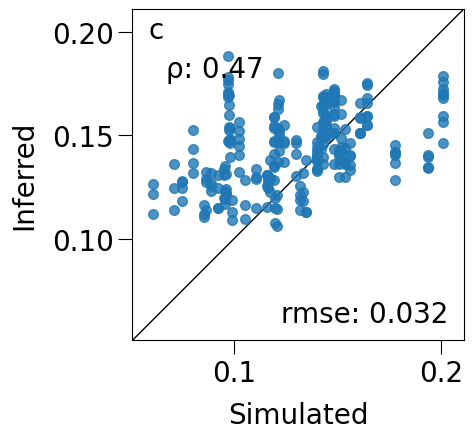

In [7]:
# THIS IS THE MODEL THAT LINH PROVIDED, CHECK HERE TO SEE IF YOUR CHANGES WORKED OR NOT

def create_dfe_cnn_linh(input_shape: tuple, n_outputs: int):
    model = Sequential()
    model.add(
        layers.Conv1D(
            filters=64,
            kernel_size=5,
            strides=2,
            input_shape=input_shape,
            activation="relu",
        )
    )
    # model.add(layers.Dropout(0.2))
    model.add(layers.Conv1D(filters=32, kernel_size=3, activation="relu"))
    model.add(layers.Conv1D(filters=16, kernel_size=2, strides=2, activation="relu"))
    model.add(layers.AveragePooling2D(pool_size=(20, 1)))
    model.add(layers.AveragePooling2D(pool_size=(1, 4)))
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(n_outputs))
    model.compile(optimizer="adam", loss="mse", metrics=["mean_squared_error"])

    return model, {}

Linh_architecture, kwargs = create_dfe_cnn_linh(r2_train_tensors.shape[1:], 3) 

kwargs.update(
    x=r2_train_tensors,
    y=r2_train_labels,
    epochs=30,
)

callback = callbacks.EarlyStopping(monitor="val_loss", patience=5)
Linh_architecture.fit(**kwargs, callbacks=[callback])

plot_LD_results(Linh_architecture, r2_test_tensors, r2_test_labels, "../All_my_plots_not_in_my_jupyter_notebooks/r2_orginal_Linh_model_1_17_24")

In [6]:
# THIS IS THE MODEL THAT LINH PROVIDED, CHECK HERE TO SEE IF YOUR CHANGES WORKED OR NOT

def create_dfe_cnn_linh(input_shape: tuple, n_outputs: int):
    model = Sequential()
    model.add(
        layers.Conv1D(
            filters=64,
            kernel_size=5,
            strides=2,
            input_shape=input_shape,
            activation="relu",
        )
    )
    # model.add(layers.Dropout(0.2))
    model.add(layers.Conv1D(filters=32, kernel_size=3, activation="relu"))
    model.add(layers.Conv1D(filters=16, kernel_size=2, strides=2, activation="relu"))
    model.add(layers.AveragePooling2D(pool_size=(20, 1)))
    model.add(layers.AveragePooling2D(pool_size=(1, 4)))
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(n_outputs))
    model.compile(optimizer="adam", loss="mse", metrics=["mean_squared_error"])

    return model, {}

Linh_architecture, kwargs = create_dfe_cnn_linh(r2_train_tensors.shape[1:], 3) 

kwargs.update(
    x=r2_train_tensors,
    y=r2_train_labels,
    epochs=30,
)

callback = callbacks.EarlyStopping(monitor="val_loss", patience=5)
Linh_architecture.fit(**kwargs, callbacks=[callback])

Linh_architecture.save('../All_my_models/r2_Linh_org_model_1_27_24') # Changed to Linh org graphs on 1/27/24

Epoch 1/30
76/76 [==============================] - 11s 129ms/step - loss: 2.1150 - mean_squared_error: 2.1150
Epoch 2/30
76/76 [==============================] - 9s 120ms/step - loss: 0.2243 - mean_squared_error: 0.2243
Epoch 3/30
76/76 [==============================] - 10s 130ms/step - loss: 0.1983 - mean_squared_error: 0.1983
Epoch 4/30
76/76 [==============================] - 9s 123ms/step - loss: 0.1856 - mean_squared_error: 0.1856
Epoch 5/30
76/76 [==============================] - 9s 121ms/step - loss: 0.1822 - mean_squared_error: 0.1822
Epoch 6/30
76/76 [==============================] - 9s 118ms/step - loss: 0.1803 - mean_squared_error: 0.1803
Epoch 7/30
76/76 [==============================] - 10s 125ms/step - loss: 0.1808 - mean_squared_error: 0.1808
Epoch 8/30
76/76 [==============================] - 10s 132ms/step - loss: 0.1798 - mean_squared_error: 0.1798
Epoch 9/30
76/76 [==============================] - 10s 129ms/step - loss: 0.1790 - mean_squared_error: 0.1790
Epoch

2024-01-27 19:29:27.618650: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'conv1d_input' with dtype float and shape [?,20,300,2]
	 [[{{node conv1d_input}}]]
2024-01-27 19:29:27.692985: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'conv1d_input' with dtype float and shape [?,20,300,2]
	 [[{{node conv1d_input}}]]
2024-01-27 19:29:27.712761: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,20,300,2]

INFO:tensorflow:Assets written to: ../All_my_models/r2_Linh_org_model_1_27_24/assets


INFO:tensorflow:Assets written to: ../All_my_models/r2_Linh_org_model_1_27_24/assets


8/8 [==============================] - 0s 36ms/step


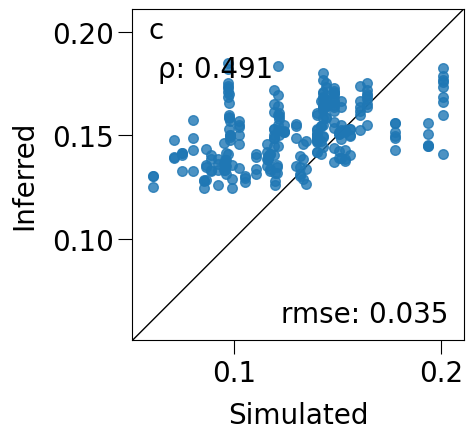

In [7]:
plot_LD_results(Linh_architecture, r2_test_scrambled_tensors, r2_test_labels, '../All_plots_I_plan_to_use_for_final/r2_Linh_org_graphs_scrambled_tensors')

8/8 [==============================] - 0s 32ms/step


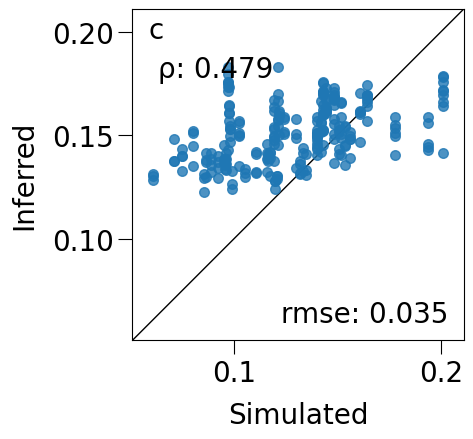

In [8]:
plot_LD_results(Linh_architecture, r2_test_free_scrambled_tensors, r2_test_labels, '../All_plots_I_plan_to_use_for_final/r2_Linh_org_graphs_free_scrambled_tensors')

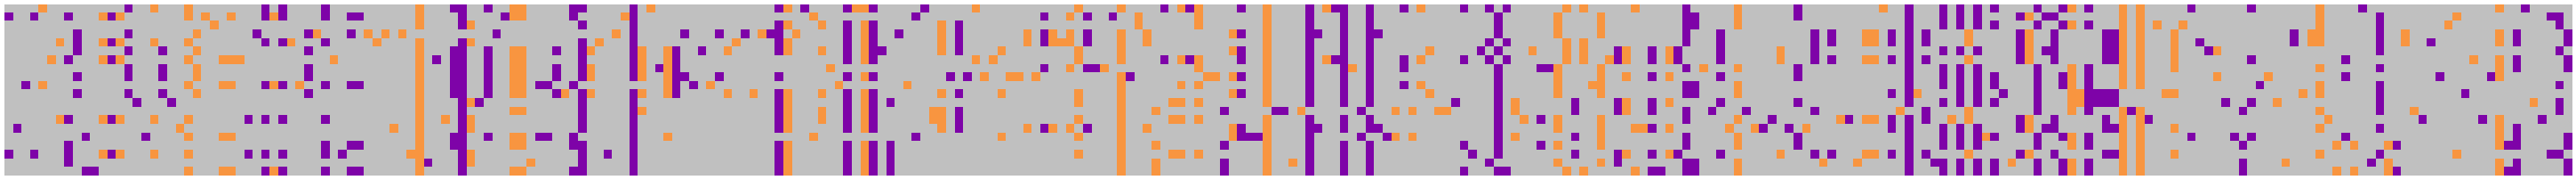

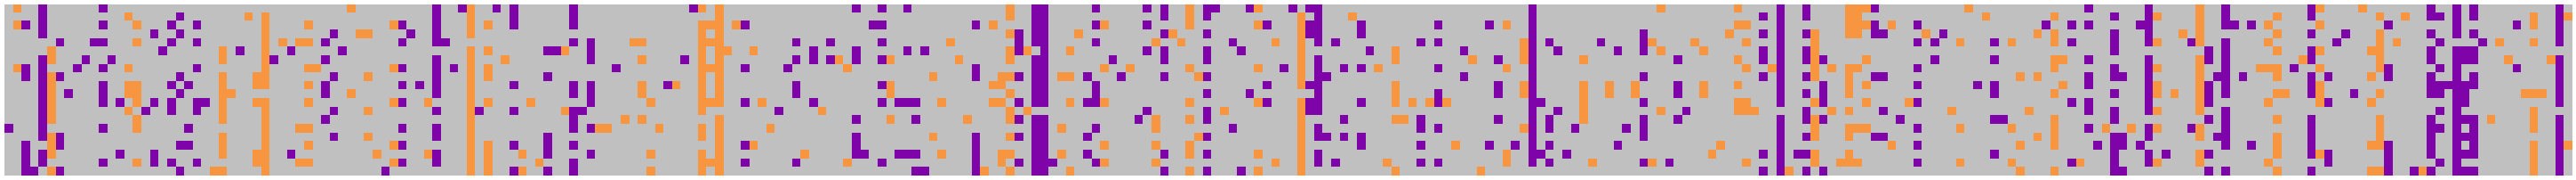

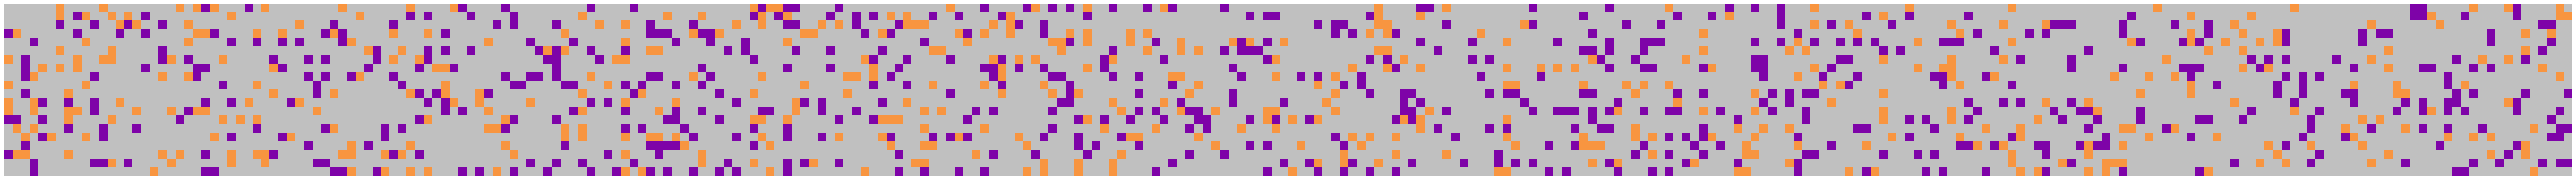

In [9]:
visualize_snp_tensor(r2_test_tensors[0])
visualize_snp_tensor(r2_test_scrambled_tensors[0])
visualize_snp_tensor(r2_test_free_scrambled_tensors[0])